In [56]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the data

In [5]:
train_data = pd.read_csv('dataset/spiral-train.txt',header = None)
val_data = pd.read_csv('dataset/spiral-dev.txt', header = None)
test_data = pd.read_csv('dataset/spiral-test.txt', header = None)
train_data.head()

,0,1,2
0,0.002428,0.020056,0
1,0.000438,0.030300,0
2,0.035561,0.049077,0
3,0.038891,0.070834,0
4,0.026560,0.086943,0


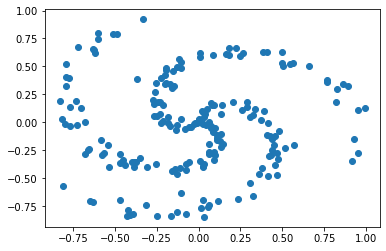

In [8]:
plt.scatter(train_data[0],train_data[1],)

/Users/shrikantkendre/miniforge3/envs/tf2M1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


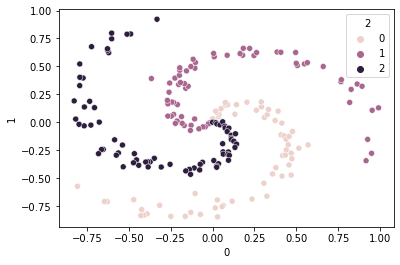

In [10]:
sns.scatterplot(train_data[0],train_data[1],hue = train_data[2])
plt.show()

## Build Model

In [26]:
knn = KNeighborsClassifier()
knn.fit(train_data.drop([2],axis=1),train_data[2])

acc = {}

for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data.drop([2],axis=1),train_data[2])
    acc[k] = accuracy_score(val_data[2],knn.predict(val_data.drop([2],axis=1)))
acc

{1: 0.975609756097561,
 2: 0.975609756097561,
 3: 1.0,
 4: 0.975609756097561,
 5: 1.0,
 6: 1.0,
 7: 0.975609756097561,
 8: 0.975609756097561,
 9: 0.975609756097561,
 10: 0.975609756097561,
 11: 1.0,
 12: 1.0,
 13: 0.975609756097561,
 14: 1.0,
 15: 0.975609756097561}

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data.drop([2],axis=1),train_data[2])
accuracy_score(test_data[2],knn.predict(test_data.drop([2],axis=1)))

1.0

## ROC-AUC curve

In [28]:
x,y = make_classification(n_samples=1000, n_classes=2, random_state=42, n_features=10)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2, random_state=42)

In [34]:
knn = KNeighborsClassifier()
lr = LogisticRegression()

knn.fit(x_train,y_train)
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
print("LR Accuracy : {}, KNN Accuracy : {}".format(accuracy_score(y_test, lr.predict(x_test)),accuracy_score(y_test, knn.predict(x_test))))

LR Accuracy : 0.85, KNN Accuracy : 0.82


In [42]:
confusion_matrix(y_test,lr.predict(x_test))

array([[335,  61],
       [ 59, 345]])

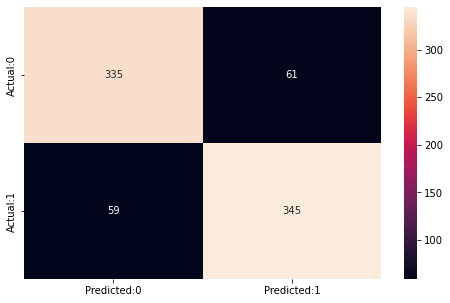

In [45]:
cm = confusion_matrix(y_test, lr.predict(x_test))
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

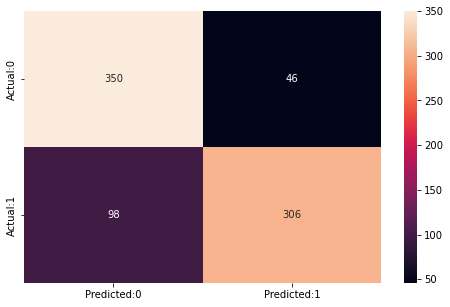

In [44]:
cm = confusion_matrix(y_test, knn.predict(x_test))
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

In [47]:
# ROC-Curve
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, lr.predict_proba(x_test)[:,1],pos_label=1) 
fpr_knn, tpr_knn, thresh_kn = roc_curve(y_test, knn.predict_proba(x_test)[:,1],pos_label=1) 

In [48]:
fpr_knn

array([0.        , 0.01515152, 0.04545455, 0.11616162, 0.26767677,
       0.58080808, 1.        ])

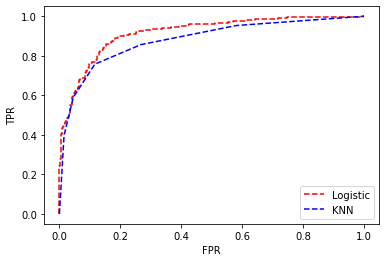

In [53]:
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='red', label='Logistic')
plt.plot(fpr_knn, tpr_knn, linestyle='--', color='blue', label='KNN')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [62]:
auc_lr = roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])
print("AUC Score for LR : {:.2f}, AUC Score for KNN : {:.2f}".format(auc_lr,auc_knn))

AUC Score for LR : 0.92, AUC Score for KNN : 0.88
